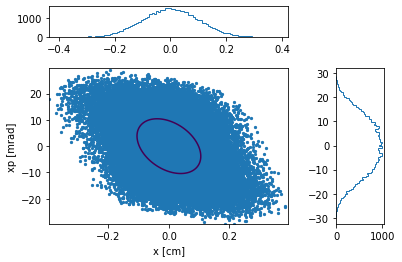

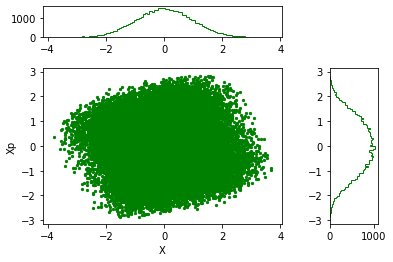

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

particle = np.loadtxt('../hw/coord.out', skiprows=1, dtype=float)
x = particle[:,4]
xp = particle[:,5]

alpha_x = 0.399
beta_x = 0.0109
gamma_x = (1 + alpha_x**2) / beta_x

emit1 = np.sqrt((np.sum(np.square(x))/np.size(x))*(np.sum(np.square(xp))/np.size(xp))
                - np.square(np.sum(np.multiply(x,xp))/np.size(x)))
n1 = 1 #You can change sigma value of ellipse here: 1sigma [68%] (n =1), 2sigma [95%] (n = 2), 3sigma [99%] (n = 3), ... 

x_ellipse = -np.linspace(-np.max(np.absolute(x)),+np.max(np.absolute(x)),1000)
xp_ellipse = np.linspace(-np.max(np.absolute(xp)),+np.max(np.absolute(xp)),1000)
mesh_x_ellipse, mesh_xp_ellipse = np.meshgrid(x_ellipse,xp_ellipse)

ellipse_eqn1 = gamma_x*mesh_x_ellipse**2 + 2*alpha_x*mesh_x_ellipse*mesh_xp_ellipse + beta_x*mesh_xp_ellipse**2

fig1 = plt.figure()
gs1 = GridSpec(4, 4)

ax1_scatter = fig1.add_subplot(gs1[1:4, 0:3])
ax1_scatter.set_xlabel('x [cm]')
ax1_scatter.set_ylabel('xp [mrad]')
ax1_hist_x = fig1.add_subplot(gs1[0, 0:3])
ax1_hist_xp = fig1.add_subplot(gs1[1:4, 3])

ax1_scatter.scatter(x, xp, s=5)
ax1_scatter.contour(mesh_x_ellipse, mesh_xp_ellipse, ellipse_eqn1, [emit1*n1**2])

ax1_hist_x.hist(x, histtype="step", bins=100)
ax1_hist_xp.hist(xp, histtype="step", bins=100, orientation = 'horizontal')

fig1.subplots_adjust(hspace=1,wspace=1)

def norm_x_xp(x, xp):

    norm_x = x / np.sqrt(beta_x)
    norm_xp = (alpha_x*x + beta_x*xp) / np.sqrt(beta_x)
    
    return norm_x, norm_xp

norm_x, norm_xp = norm_x_xp(x, xp)

fig2 = plt.figure()
gs2 = GridSpec(4, 4)

ax2_scatter_norm = fig2.add_subplot(gs2[1:4, 0:3])
ax2_scatter_norm.set_xlabel('X')
ax2_scatter_norm.set_ylabel('Xp')
ax2_hist_norm_x = fig2.add_subplot(gs2[0, 0:3])
ax2_hist_norm_xp = fig2.add_subplot(gs2[1:4, 3])

ax2_scatter_norm.scatter(norm_x, norm_xp, s=5, c='green')
ax2_hist_norm_x.hist(norm_x, color='green', histtype="step", bins=100)
ax2_hist_norm_xp.hist(norm_xp, color='green', histtype="step", bins=100, orientation = 'horizontal')

fig2.subplots_adjust(hspace=1,wspace=1)